## Domain – Retail

### focus – Visualize the sales data## 

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading data from file into dataframe

df_sales=pd.read_csv(r"./datasets/BigMartSalesData.csv")

In [3]:
df_sales.head(-10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541859,581587,22631,CIRCUS PARADE LUNCH BOX,12,1.95,23.40,09-12-11,9,12,2011,12680.0,France
541860,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,1.65,19.80,09-12-11,9,12,2011,12680.0,France
541861,581587,22555,PLASTERS IN TIN STRONGMAN,12,1.65,19.80,09-12-11,9,12,2011,12680.0,France
541862,581587,22728,ALARM CLOCK BAKELIKE PINK,4,3.75,15.00,09-12-11,9,12,2011,12680.0,France


In [4]:
df_sales.describe()

,Quantity,UnitPrice,Amount,Day,Month,Year,CustomerID
count,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,406829.000000
mean,11.341028,4.610038,21.297578,15.022902,7.553228,2010.921607,15287.690570
std,218.002505,96.762800,378.651364,8.663960,3.509063,0.268789,1713.600303
min,1.000000,-11062.060000,-11062.060000,1.000000,1.000000,2010.000000,12346.000000
25%,1.000000,1.250000,3.750000,7.000000,5.000000,2011.000000,13953.000000
50%,3.000000,2.080000,9.900000,15.000000,8.000000,2011.000000,15152.000000
75%,10.000000,4.130000,17.700000,22.000000,11.000000,2011.000000,16791.000000
max,80995.000000,38970.000000,168469.600000,31.000000,12.000000,2011.000000,18287.000000


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541874 entries, 0 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541874 non-null  object 
 1   StockCode    541874 non-null  object 
 2   Description  540422 non-null  object 
 3   Quantity     541874 non-null  int64  
 4   UnitPrice    541874 non-null  float64
 5   Amount       541874 non-null  float64
 6   InvoiceDate  541874 non-null  object 
 7   Day          541874 non-null  int64  
 8   Month        541874 non-null  int64  
 9   Year         541874 non-null  int64  
 10  CustomerID   406829 non-null  float64
 11  Country      541874 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.6+ MB


In [6]:
df_sales["Year"].value_counts(sort=False)

2010     42479
2011    499395
Name: Year, dtype: int64

In [7]:
df_sales = df_sales[df_sales["Year"] == 2011]

In [8]:
df_sales["Year"].value_counts(sort=False)

2011    499395
Name: Year, dtype: int64

In [9]:
df_sales.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Amount', 'InvoiceDate', 'Day', 'Month', 'Year', 'CustomerID',
       'Country'],
      dtype='object')

In [10]:
df_sales.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'InvoiceDate', 'Day', 'CustomerID'],inplace=True)

In [11]:
df_sales.head()

,Amount,Month,Year,Country
42479,19.5,1,2011,United Kingdom
42480,10.5,1,2011,United Kingdom
42481,10.5,1,2011,United Kingdom
42482,10.5,1,2011,United Kingdom
42483,12.5,1,2011,United Kingdom


In [12]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499395 entries, 42479 to 541873
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Amount   499395 non-null  float64
 1   Month    499395 non-null  int64  
 2   Year     499395 non-null  int64  
 3   Country  499395 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 19.1+ MB


In [13]:
## Generating Monthly Sales Data
df_month_sales = pd.DataFrame(df_sales.groupby(by=['Month'])['Amount'].sum())

In [14]:
df_month_sales

,Amount
Month,
1,822669.640
2,549134.460
3,752003.310
4,582318.451
5,817655.200
6,832231.670
7,757108.941
8,791173.020
9,1097467.722


In [15]:
df_month_sales.reset_index(inplace=True)

In [16]:
df_month_sales

,Month,Amount
0,1,822669.640
1,2,549134.460
2,3,752003.310
3,4,582318.451
4,5,817655.200
5,6,832231.670
6,7,757108.941
7,8,791173.020
8,9,1097467.722
9,10,1239237.260


In [17]:
df_month_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   12 non-null     int64  
 1   Amount  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


In [18]:
X=df_month_sales["Month"]
Y=df_month_sales["Amount"]

### 1. Plot Total Sales Per Month for Year 2011. How the total sales have increased over months in Year 2011. Which month has lowest Sales?

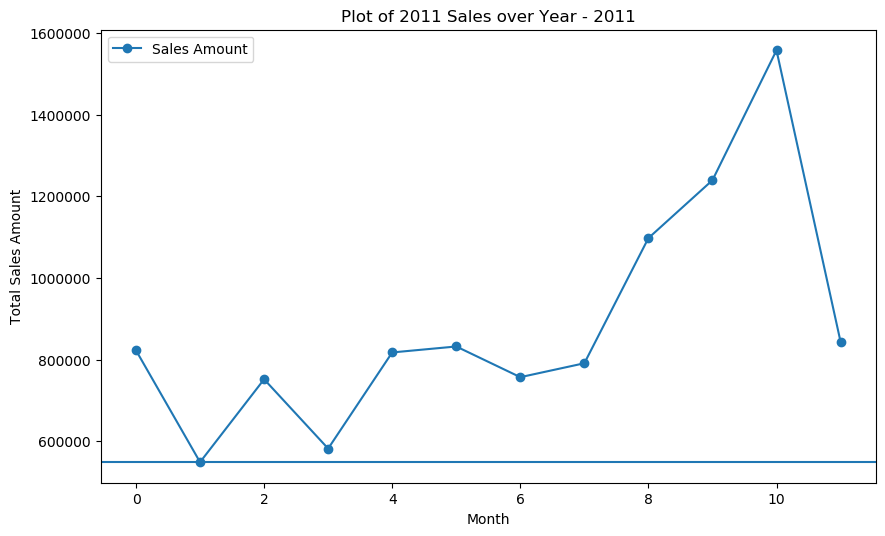

In [19]:
## Generating a simple plot of sales data

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(Y,linestyle='-', marker='o',label='Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Plot of 2011 Sales over Year - 2011')

#plt.axhline(df_month_sales.Amount.max())
plt.axhline(df_month_sales.Amount.min())


plt.legend()

### 2. Plot Total Sales Per Month for Year 2011 as Bar Chart. Is Bar Chart Better to visualize than Simple Plot?

### From above graph, it is determined that 2nd Month has lowest sales

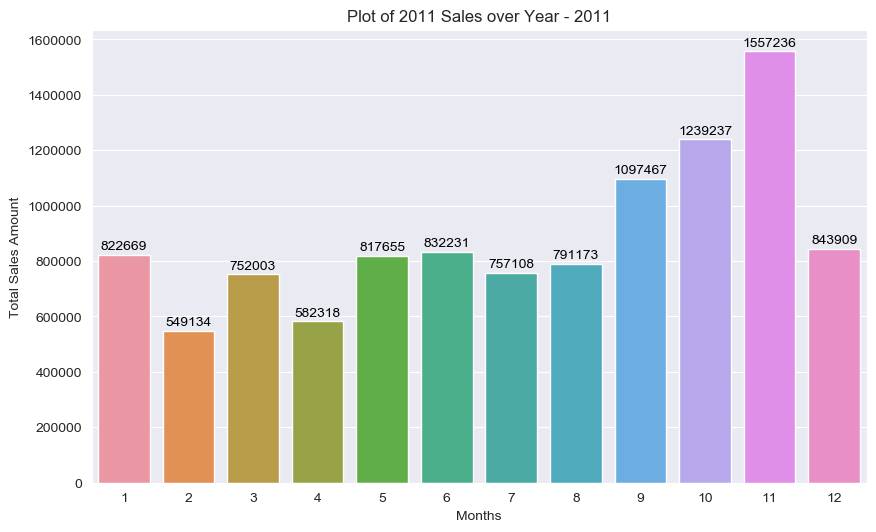

In [20]:
sns.set_style('darkgrid')
#plt.figure(figsize=(15,6))
plt.figure(figsize=(10, 6), dpi=100)
width = 0.35

s=sns.barplot(x=X,y=Y)
plt.xlabel("Months")
plt.ylabel("Total Sales Amount")
plt.title("Plot of 2011 Sales over Year - 2011")
#ax.set_xticks(ind + width / 2)
#ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

for a,b in zip(X,Y):
    plt.text( a - 1, b + 30000, int(b), color='black',horizontalalignment='center',verticalalignment='center')
    

plt.show()

### Bar plot gives a better visualization of total sales than line plot

### 3. Plot Pie Chart for Year 2011 Country Wise. Which Country contributes highest towards sales?

In [21]:
## Generating Monthly Sales Data by Country
df_country_sales = pd.DataFrame(df_sales.groupby(by=['Country'])['Amount'].sum())

In [22]:
df_country_sales.reset_index(inplace=True)

In [23]:
df_country_sales

,Country,Amount
0,Australia,1.389047e+05
1,Austria,9.945680e+03
2,Bahrain,7.541400e+02
3,Belgium,3.967181e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.045106e+04
7,Cyprus,1.264365e+04
8,Czech Republic,9.457600e+02
9,Denmark,1.786104e+04


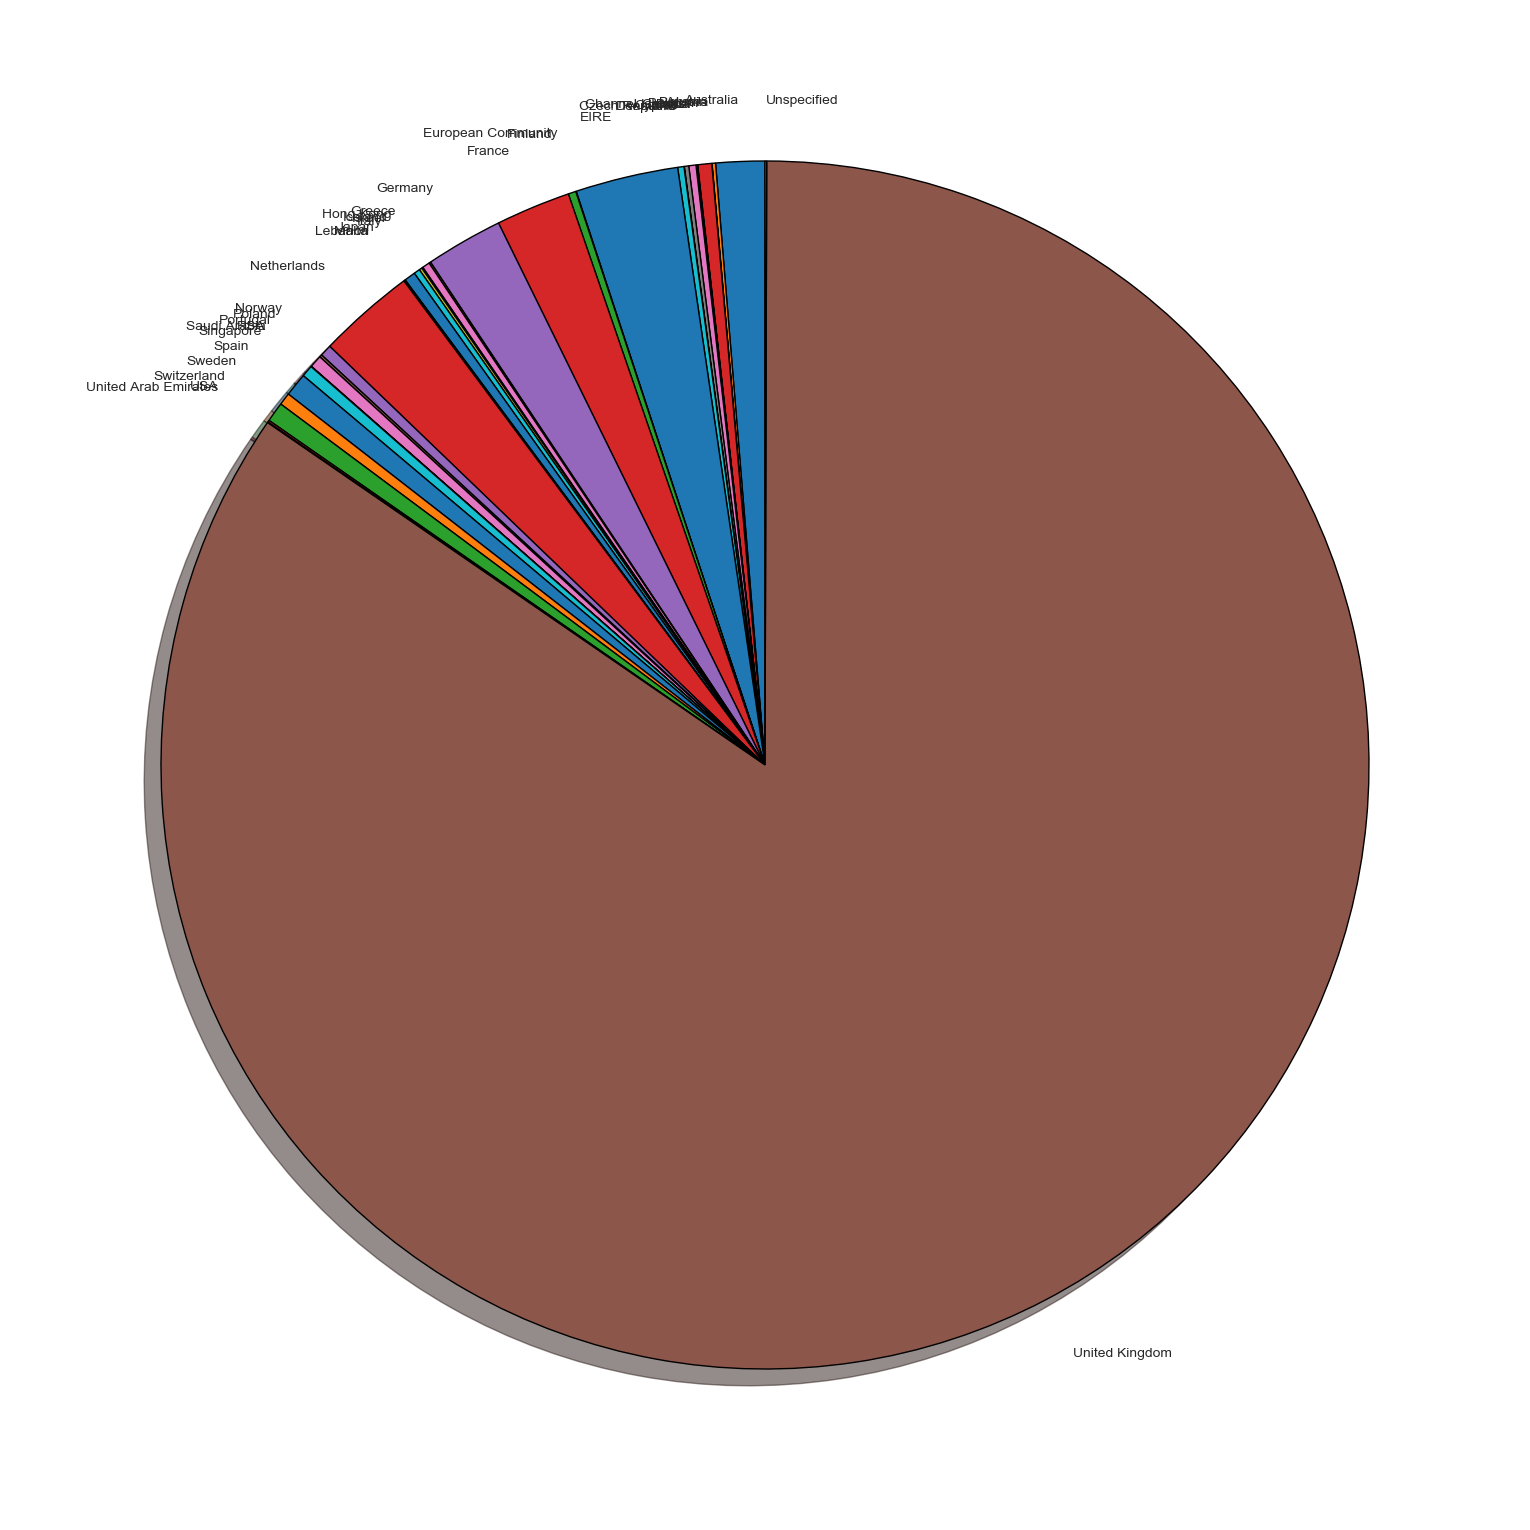

In [24]:
plt.figure(figsize=(20, 20), dpi=100)
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
plt.pie(df_country_sales["Amount"], labels = df_country_sales["Country"],
        shadow = True,
        wedgeprops = wp,
       startangle = 90)

plt.show()

## United Kingdom has the highest sales of the year

### 4. Plot Scatter Plot for the invoice amounts and see the concentration of amount. In which range most of the invoice amounts are concentrated

In [26]:
df_sales.head()

,Amount,Month,Year,Country
42479,19.5,1,2011,United Kingdom
42480,10.5,1,2011,United Kingdom
42481,10.5,1,2011,United Kingdom
42482,10.5,1,2011,United Kingdom
42483,12.5,1,2011,United Kingdom


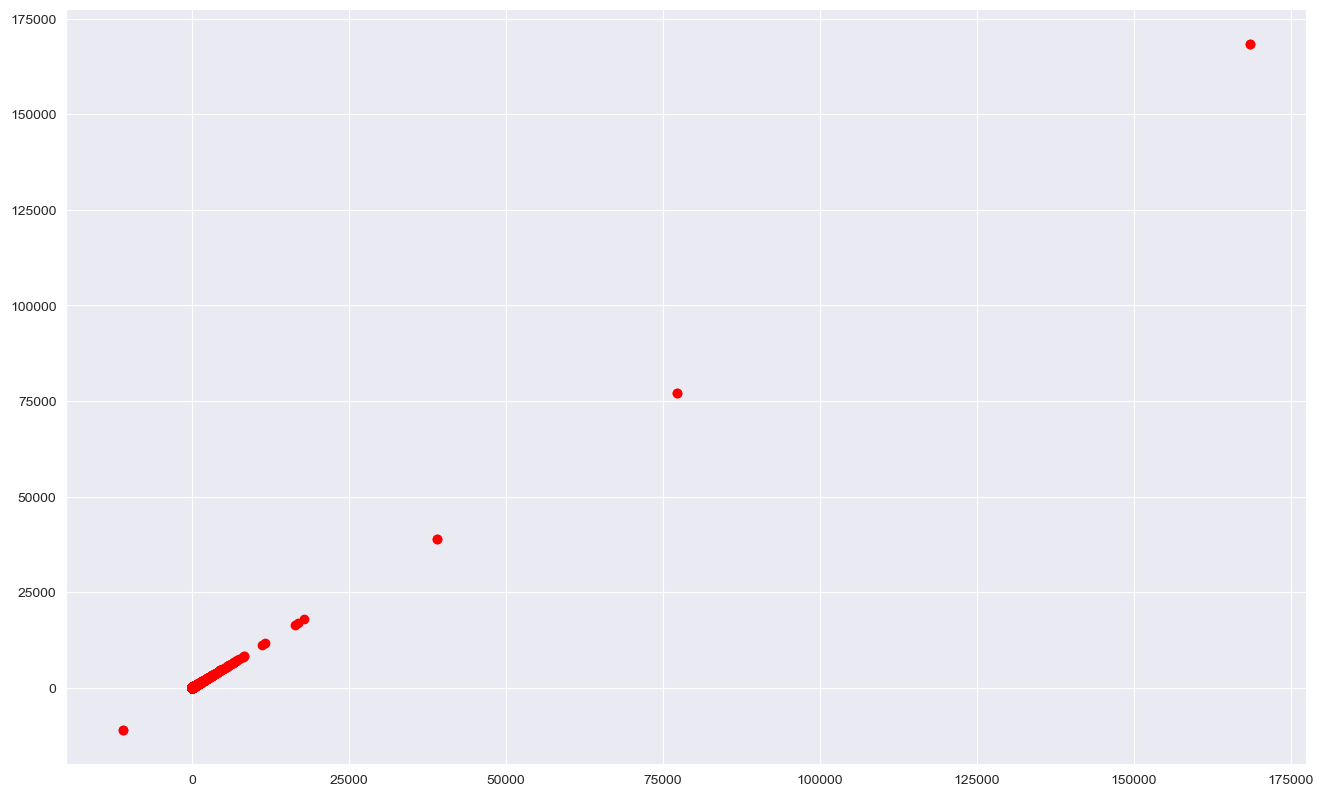

In [29]:
plt.figure(figsize=(16, 10), dpi=100)
plt.scatter(df_sales["Amount"],df_sales["Amount"],marker= 'o',color='red')
plt.show()